# Logistic Regression Precision / Recall Curve

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (17, 8)

import pickle
import pandas as pd
import seaborn as sns; sns.set_style("whitegrid")

repo_path = '/Users/alex/Documents/gslr/'
KEGG_path = repo_path + 'experiments/KEGG/KEGG_df.filtered.with_correlates.pickle'

# File was serialized like so: 
#   logit_pr_results = [(pathway_id, scores, classifier.coef_, classifier.Cs_), ...]
#   pickle.dump(results, open('logit_pr_results.pickle', 'wb'))

Populating the interactive namespace from numpy and matplotlib


## I. Extract Data

### i. Load data

In [2]:
nodes = pd.read_csv(repo_path + 'experiments/generated_data/4/hsa04110_inbiomap_exp.csv', index_col=0).columns

In [3]:
pathways_df = pd.read_pickle(KEGG_path)

pathways = {pathway_id: set(pathways_df.loc[pd.IndexSlice[:, :, [pathway_id]],['genes', 'correlates']].values[0][0]) for pathway_id in pathways_df.index.get_level_values(2)}

In [4]:
results = pickle.load(open('logit_gmm_pr_results.pickle', 'rb'))

### ii. Define Precision and Recall

In [5]:
def recall(truth, pred):    
    return len(truth & pred) / float(len(truth))
    
def precision(truth, pred):
    if len(pred) == 0: return float(0)
    return len(truth & pred) / float(len(pred))

### iii. Retrieve Scores, Precisions, and Recalls for every pathway for every fold for every sparsity

In [6]:
scores = pd.DataFrame({pathway_id: {('fold_'+str(i), C): score for i, fold_scores in enumerate(scores[0]) for C, score in zip(Cs, fold_scores)} for pathway_id, scores, coefs, Cs in results})

scores.head()

hsa00970  hsa01521  hsa01522  hsa01523  hsa01524  hsa02010  \
fold_0 0.000100       0.5       0.5       0.5       0.5       0.5       0.5   
       0.000341       0.5       0.5       0.5       0.5       0.5       0.5   
       0.001166       0.5       0.5       0.5       0.5       0.5       0.5   
       0.003981       0.5       0.5       0.5       0.5       0.5       0.5   
       0.013594       0.5       0.5       0.5       0.5       0.5       0.5   

                 hsa03008  hsa03010  hsa03013  hsa03015    ...     hsa05322  \
fold_0 0.000100       0.5       0.5       0.5       0.5    ...         0.50   
       0.000341       0.5       0.5       0.5       0.5    ...         0.50   
       0.001166       0.5       0.5       0.5       0.5    ...         0.50   
       0.003981       0.5       0.5       0.5       0.5    ...         0.50   
       0.013594       0.5       0.5       0.5       0.5    ...         0.55   

                 hsa05323  hsa05330  hsa05332  hsa05340  hsa05410  hsa05412  \
fold_0 0.000100      0.50      0.50      0.50       0.5       0.5       0.5   
       0.000341      0.50      0.50      0.50       0.5       0.5       0.5   
       0.001166      0.50      0.50      0.50       0.5       0.5       0.5   
       0.003981      0.50      0.50      0.50       0.5       0.5       0.5   
       0.013594      0.65      0.85      0.75       0.6       0.7       0.7   

                 hsa05414  hsa05416  hsa05418  
fold_0 0.000100       0.5      0.50       0.5  
       0.000341       0.5      0.50       0.5  
       0.001166       0.5      0.50       0.5  
       0.003981       0.5      0.50       0.5  
       0.013594       0.5      0.55       0.9  

[5 rows x 229 columns]

In [7]:
recalls = pd.DataFrame({pathway_id: {('fold_'+str(i), C): recall(pathways[pathway_id], set(nodes[coefs[:-1].nonzero()])) for i, fold_coefs in enumerate(coefs['negative']) for C, coefs in zip(Cs, fold_coefs)} for pathway_id, scores, coefs, Cs in results if len(pathways[pathway_id]) > 0})
recalls.head()

hsa00970  hsa02010  hsa03008  hsa03010  hsa03013  hsa03015  \
fold_0 0.000100       0.0       0.0       0.0       0.0       0.0       0.0   
       0.000341       0.0       0.0       0.0       0.0       0.0       0.0   
       0.001166       0.0       0.0       0.0       0.0       0.0       0.0   
       0.003981       0.0       0.0       0.0       0.0       0.0       0.0   
       0.013594       0.0       0.0       0.0       0.0       0.0       0.0   

                 hsa03018  hsa03020  hsa03022  hsa03030    ...     hsa05322  \
fold_0 0.000100       0.0       0.0       0.0       0.0    ...     0.000000   
       0.000341       0.0       0.0       0.0       0.0    ...     0.000000   
       0.001166       0.0       0.0       0.0       0.0    ...     0.000000   
       0.003981       0.0       0.0       0.0       0.0    ...     0.000000   
       0.013594       0.0       0.0       0.0       0.0    ...     0.007519   

                 hsa05323  hsa05330  hsa05332  hsa05340  hsa05410  hsa05412  \
fold_0 0.000100  0.000000  0.000000   0.00000  0.000000  0.000000  0.000000   
       0.000341  0.000000  0.000000   0.00000  0.000000  0.000000  0.000000   
       0.001166  0.000000  0.000000   0.00000  0.000000  0.000000  0.000000   
       0.003981  0.000000  0.000000   0.00000  0.000000  0.000000  0.000000   
       0.013594  0.011111  0.026316   0.02439  0.027027  0.012048  0.013889   

                 hsa05414  hsa05416  hsa05418  
fold_0 0.000100       0.0  0.000000  0.000000  
       0.000341       0.0  0.000000  0.000000  
       0.001166       0.0  0.000000  0.000000  
       0.003981       0.0  0.000000  0.000000  
       0.013594       0.0  0.016949  0.014388  

[5 rows x 225 columns]

In [8]:
precisions = pd.DataFrame({pathway_id: {('fold_'+str(i), C): precision(pathways[pathway_id], set(nodes[coefs[:-1].nonzero()])) for i, fold_coefs in enumerate(coefs['negative']) for C, coefs in zip(Cs, fold_coefs)} for pathway_id, scores, coefs, Cs in results if len(pathways[pathway_id]) > 0})
precisions.head()

hsa00970  hsa02010  hsa03008  hsa03010  hsa03013  hsa03015  \
fold_0 0.000100       0.0       0.0       0.0       0.0       0.0       0.0   
       0.000341       0.0       0.0       0.0       0.0       0.0       0.0   
       0.001166       0.0       0.0       0.0       0.0       0.0       0.0   
       0.003981       0.0       0.0       0.0       0.0       0.0       0.0   
       0.013594       0.0       0.0       0.0       0.0       0.0       0.0   

                 hsa03018  hsa03020  hsa03022  hsa03030    ...     hsa05322  \
fold_0 0.000100       0.0       0.0       0.0       0.0    ...          0.0   
       0.000341       0.0       0.0       0.0       0.0    ...          0.0   
       0.001166       0.0       0.0       0.0       0.0    ...          0.0   
       0.003981       0.0       0.0       0.0       0.0    ...          0.0   
       0.013594       0.0       0.0       0.0       0.0    ...          1.0   

                 hsa05323  hsa05330  hsa05332  hsa05340  hsa05410  hsa05412  \
fold_0 0.000100       0.0       0.0       0.0       0.0       0.0       0.0   
       0.000341       0.0       0.0       0.0       0.0       0.0       0.0   
       0.001166       0.0       0.0       0.0       0.0       0.0       0.0   
       0.003981       0.0       0.0       0.0       0.0       0.0       0.0   
       0.013594       1.0       1.0       1.0       1.0       1.0       1.0   

                 hsa05414  hsa05416  hsa05418  
fold_0 0.000100       0.0       0.0       0.0  
       0.000341       0.0       0.0       0.0  
       0.001166       0.0       0.0       0.0  
       0.003981       0.0       0.0       0.0  
       0.013594       0.0       1.0       1.0  

[5 rows x 225 columns]

## II. Construct Precision/Recall curve for these data

### i. Try one way

In [9]:
PR = pd.concat([precisions.swaplevel().sortlevel().melt(value_name='precision')['precision'], recalls.swaplevel().sortlevel().melt(value_name='recall')['recall']], axis=1)
PR.head()

/Users/alex/Documents/gslr/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  """Entry point for launching an IPython kernel.


,precision,recall
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [10]:
precision_list, recall_list = zip(*list(PR.to_records(index=False)))

NameError: name 'c' is not defined

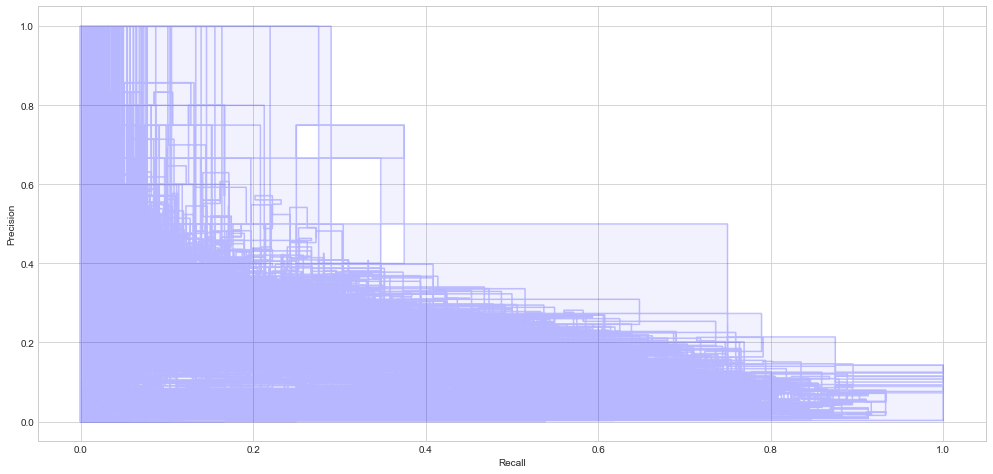

In [11]:
plt.step(recall_list, precision_list, color='b', alpha=0.2, where='post')
plt.fill_between(recall_list, precision_list, step='post', alpha=0.05, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
c
# plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

### ii. Try another way. 

In [12]:
recalls = recalls.stack().swaplevel().sortlevel().swaplevel(i=0,j=1).sortlevel().unstack(level=2)
precisions = precisions.stack().swaplevel().sortlevel().swaplevel(i=0,j=1).sortlevel().unstack(level=2)

/Users/alex/Documents/gslr/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: sortlevel is deprecated, use sort_index(level=...)
  """Entry point for launching an IPython kernel.
/Users/alex/Documents/gslr/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: sortlevel is deprecated, use sort_index(level=...)
  


(0.0, 1.05)

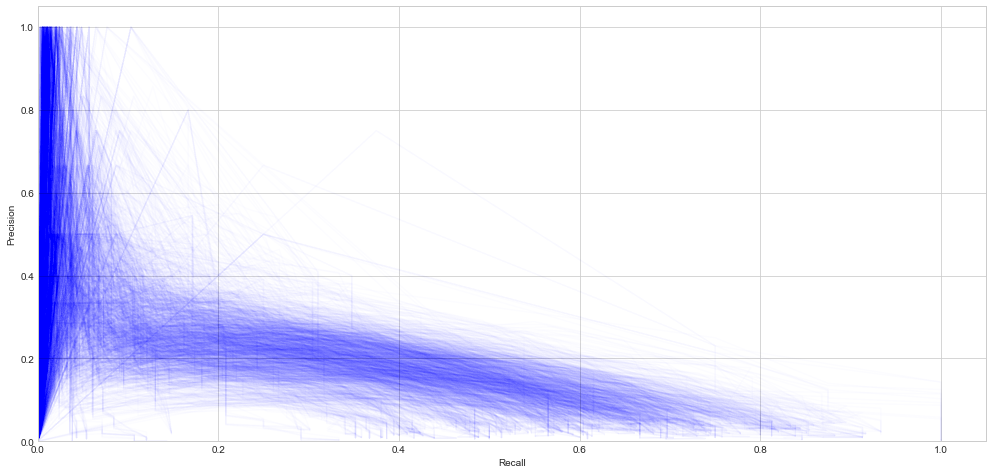

In [13]:
[plt.plot(recalls.iloc[k].values, precisions.iloc[k].values, c='b', alpha=0.01) for k in range(len(recalls))]

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])

In [14]:
scores = scores.stack().swaplevel().sortlevel().swaplevel(i=0,j=1).sortlevel().unstack(level=2)

/Users/alex/Documents/gslr/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: sortlevel is deprecated, use sort_index(level=...)
  """Entry point for launching an IPython kernel.


In [15]:
scores.to_pickle('logit_gmm_pr_scores.pickle')
recalls.to_pickle('logit_gmm_pr_recalls.pickle')
precisions.to_pickle('logit_gmm_pr_precisions.pickle')